<a href="https://colab.research.google.com/github/dhaura/PCII/blob/main/Base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
  https://datasets.simula.no/kvasir/data/kvasir-dataset-v2.zip\
  -O /tmp/kvasir-dataset-v2.zip

--2021-03-06 09:38:33--  https://datasets.simula.no/kvasir/data/kvasir-dataset-v2.zip
Resolving datasets.simula.no (datasets.simula.no)... 128.39.36.14
Connecting to datasets.simula.no (datasets.simula.no)|128.39.36.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2489312085 (2.3G) [application/zip]
Saving to: ‘/tmp/kvasir-dataset-v2.zip’

/tmp/kvasir-dataset 100%[===================>]   2.32G  11.2MB/s    in 2m 4s   

2021-03-06 09:40:37 (19.2 MB/s) - ‘/tmp/kvasir-dataset-v2.zip’ saved [2489312085/2489312085]



In [ ]:
import os
import zipfile

local_zip = '/tmp/kvasir-dataset-v2.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
try:
    os.mkdir('/tmp/kvasir-dataset-e-v2')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/dyed-lifted-polyps')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/dyed-resection-margins')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/esophagitis')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/normal-cecum')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/normal-pylorus')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/normal-z-line')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/polyps')
    os.mkdir('/tmp/kvasir-dataset-e-v2/training/ulcerative-colitis')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/dyed-lifted-polyps')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/dyed-resection-margins')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/esophagitis')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/normal-cecum')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/normal-pylorus')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/normal-z-line')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/polyps')
    os.mkdir('/tmp/kvasir-dataset-e-v2/testing/ulcerative-colitis')
except OSError:
    pass

In [ ]:
import random
import shutil
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    selected_images = []
    
    for image in os.listdir(SOURCE):
        image_path = SOURCE + image
        if (os.path.getsize(image_path) > 0):
            selected_images.append(image)
    
    shuffled_images = random.sample(selected_images, len(selected_images))
    
    len_train_images = int(len(selected_images) * SPLIT_SIZE)
    
    for image in shuffled_images[0:len_train_images]:
        copyfile(SOURCE+image, TRAINING+image)
    
    for image in shuffled_images[len_train_images:]:
        copyfile(SOURCE+image, TESTING+image)

In [ ]:
split_size = .9
split_data('/tmp/kvasir-dataset-v2/dyed-lifted-polyps/', '/tmp/kvasir-dataset-e-v2/training/dyed-lifted-polyps/', '/tmp/kvasir-dataset-e-v2/testing/dyed-lifted-polyps/', split_size)
split_data('/tmp/kvasir-dataset-v2/dyed-resection-margins/', '/tmp/kvasir-dataset-e-v2/training/dyed-resection-margins/', '/tmp/kvasir-dataset-e-v2/testing/dyed-resection-margins/', split_size)
split_data('/tmp/kvasir-dataset-v2/esophagitis/', '/tmp/kvasir-dataset-e-v2/training/esophagitis/', '/tmp/kvasir-dataset-e-v2/testing/esophagitis/', split_size)
split_data('/tmp/kvasir-dataset-v2/normal-cecum/', '/tmp/kvasir-dataset-e-v2/training/normal-cecum/', '/tmp/kvasir-dataset-e-v2/testing/normal-cecum/', split_size)
split_data('/tmp/kvasir-dataset-v2/normal-pylorus/', '/tmp/kvasir-dataset-e-v2/training/normal-pylorus/', '/tmp/kvasir-dataset-e-v2/testing/normal-pylorus/', split_size)
split_data('/tmp/kvasir-dataset-v2/normal-z-line/', '/tmp/kvasir-dataset-e-v2/training/normal-z-line/', '/tmp/kvasir-dataset-e-v2/testing/normal-z-line/', split_size)
split_data('/tmp/kvasir-dataset-v2/polyps/', '/tmp/kvasir-dataset-e-v2/training/polyps/', '/tmp/kvasir-dataset-e-v2/testing/polyps/', split_size)
split_data('/tmp/kvasir-dataset-v2/ulcerative-colitis/', '/tmp/kvasir-dataset-e-v2/training/ulcerative-colitis/', '/tmp/kvasir-dataset-e-v2/testing/ulcerative-colitis/', split_size)


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir = '/tmp/kvasir-dataset-e-v2'

train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'testing')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=126,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=126,
    class_mode='categorical'
)

Found 7200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    epochs=50,
    steps_per_epoch=20,
    validation_data=validation_generator,
    verbose=1,
    validation_steps=3
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
20/20 [==============================] - 101s 4s/step - loss: 3.1418 - accuracy: 0.1251 - val_loss: 1.9920 - val_accuracy: 0.1138
Epoch 2/50
20/20 [==============================] - 69s 3s/step - loss: 2.0834 - accuracy: 0.1622 - val_loss: 1.9883 - val_accuracy: 0.1376
Epoch 3/50
20/20 [==============================] - 68s 3s/step - loss: 2.0237 - accuracy: 0.1707 - val_loss: 2.2413 - val_accuracy: 0.2011
Epoch 4/50
20/20 [==============================] - 71s 4s/step - loss: 1.7776 - accuracy: 0.2808 - val_loss: 1.3589 - val_accuracy: 0.3413
Epoch 5/50
20/20 [==============================] - 71s 4s/step - loss: 1.3719 - accuracy: 0.3889 - val_loss: 1.1846 - val_accuracy: 0.4868
Epoch 6/50
20/20 [==============================] - 72s 4s/step - loss: 1.4258 - accuracy: 0.3710 - val_loss: 1.4900 - val_accuracy: 0.3466
Epoch 7/50
20/20 [==============================] - 72s 4s/step - loss: 1.2598 - accuracy: 0.3967 - val_loss: 1.4108 - val_accuracy: 0.3280
Epoch 8/50
20/20 [=

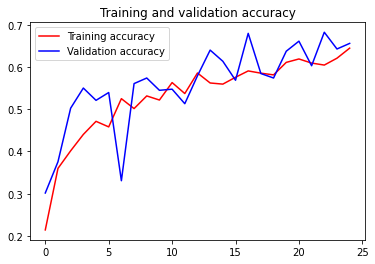

<Figure size 432x288 with 0 Axes>

In [ ]:
model.save('pcii.h5')

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()